# Linear Regression in Python

1. Solves the Linear Regression problem.
2. Uses Python Class to efficiently implement Linear Regression 

In [4]:
#%% Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

#%% Setting random seed
np.random.seed(10)

In [5]:
#%% Build model
class LinearRegression():
    r"""
    Linear Regression class
    """
    def __init__(self, slope, intercept, lr):
        self.slope = slope
        self.intercept = intercept
        self.lr = lr
        
    def predict(self, data):
        r""" 
        Predicts output given input data
        """
        out = np.dot(self.slope, data.T) + self.intercept
        self.d = data
        return out.T
    
    def MSEloss(self,predicted, true):
        r"""
        Calculates MSE loss and also calculates gradients of slope, intercept
        """
        error = predicted - true
        loss = (error**2).mean()
        
        # Gradients
        self.slope_grad =  2 * (self.d * error).mean()
        self.intercept_grad = 2 * error.mean()
        
        return loss
    
    def update(self):
        r"""
        Updates parameters and makes gradients zero after update
        """
        self.slope -= self.lr * self.slope_grad
        self.intercept -= self.lr * self.intercept_grad
        
        self.slope_grad = 0
        self.intercept_grad = 0

In [6]:
#%% Generate Data
# Generate Random data
x = np.random.randn(100,1)

# Generate random noise [same shape as input]
noise = np.random.randn(100,1)

# Generate true outputs
# ( y = mx + c)
y_true = 3 * x + 2 + 0.2 * noise 

In [7]:
#%% Initiate model
model = LinearRegression(slope= 1,intercept= 0.2, lr= 0.01)

In [13]:
print('Before Training')
print('Slope : ', model.slope)
print('Intercept : ', model.intercept)

Before Training
Slope :  3.0132614509372453
Intercept :  2.012786256560173


In [9]:
#%% Start training

losses = np.array([])

for i in range(100000):
    
    y_pred = model.predict(x)
    
    loss = model.MSEloss(y_pred, y_true)
    losses = np.append(losses, loss)
    
    model.update()

In [14]:
print('After Training')
print('Slope : ', model.slope)
print('Intercept : ', model.intercept)

After Training
Slope :  3.0132614509372453
Intercept :  2.012786256560173


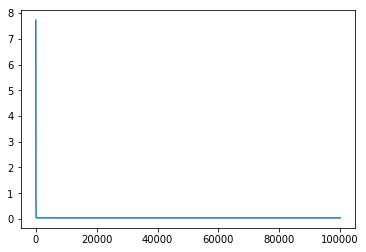

In [11]:
# Plot Loss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(losses.size),losses)

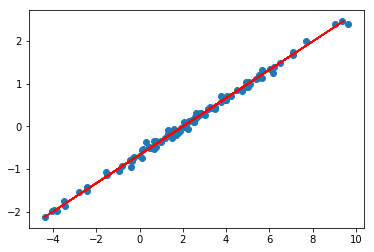

In [12]:
# Regression Line
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(y_true, x)
y = model.predict(x)
ax2.plot(y,x, c = 'red')